In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series = pd.Series([119, 116, 120, 134, 119, 117, 115, 122, 125, 124, 128, 122, 135, 126, 135, 120, 112, 119, 115, 124, 120, 117, 123, 140, 125, 130, 113, 128, 125, 115, 131, 122, 120, 138, 116])

In [3]:
series

0     119
1     116
2     120
3     134
4     119
5     117
6     115
7     122
8     125
9     124
10    128
11    122
12    135
13    126
14    135
15    120
16    112
17    119
18    115
19    124
20    120
21    117
22    123
23    140
24    125
25    130
26    113
27    128
28    125
29    115
30    131
31    122
32    120
33    138
34    116
dtype: int64

In [4]:
series.min()

112

In [5]:
classes = np.empty((0,2), int)

for indicator in np.arange(start=series.min(), stop=series.max()+0.1, step=4):
    classes = np.append(classes, np.array([[indicator, indicator+3]]), axis=0)
    
print(classes)

[[112. 115.]
 [116. 119.]
 [120. 123.]
 [124. 127.]
 [128. 131.]
 [132. 135.]
 [136. 139.]
 [140. 143.]]


In [6]:
df = pd.DataFrame(classes)
df

,0,1
0,112.0,115.0
1,116.0,119.0
2,120.0,123.0
3,124.0,127.0
4,128.0,131.0
5,132.0,135.0
6,136.0,139.0
7,140.0,143.0


In [7]:
test = {}
for row in df.iterrows():
    
    counter = np.logical_and(series >= row[1][0], series <= row[1][1]).value_counts()
    
    if counter.get(True):
        total = counter[True]
    else:
        total = 0
    
    test['{} - {}'.format(str(row[1][0]), str(row[1][1]))] = total

df2 = pd.DataFrame.from_dict(test, orient='index')
df2

,0
112.0 - 115.0,5
116.0 - 119.0,7
120.0 - 123.0,8
124.0 - 127.0,6
128.0 - 131.0,4
132.0 - 135.0,3
136.0 - 139.0,1
140.0 - 143.0,1


In [8]:
df2['Frequency'] = (df2[0]/df2[0].sum()) * 100

In [9]:
df2 = df2.reset_index()
df2.columns = ['Class','Frequency', 'Relative Frequency %']
df2

,Class,Frequency,Relative Frequency %
0,112.0 - 115.0,5,14.285714
1,116.0 - 119.0,7,20.000000
2,120.0 - 123.0,8,22.857143
3,124.0 - 127.0,6,17.142857
4,128.0 - 131.0,4,11.428571
5,132.0 - 135.0,3,8.571429
6,136.0 - 139.0,1,2.857143
7,140.0 - 143.0,1,2.857143


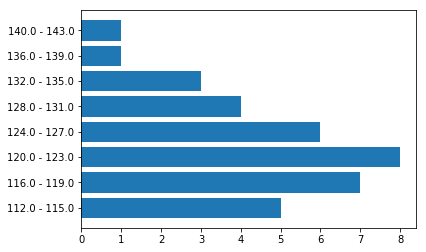

In [10]:
plt.barh(df2['Class'], df2['Frequency'])
plt.show()